In [471]:

num = 0
for i in range(len(L)):
    if(i == X):
        continue
    if(z[i]<0.06414749634878436 and L[i] > 0.03207374817439218):
        num += 1
print(num)

6


In [467]:
X=82

In [468]:
print(L_lim(0.5, z[X]))
print(z[X])
print(L[X])

0.03207374817439218
0.06414749634878436
0.5772285886041676


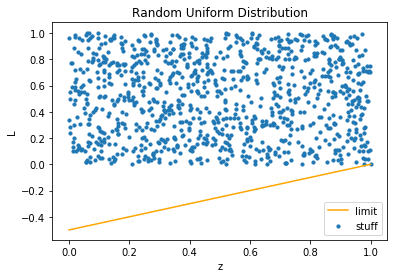

In [7]:
import numpy as np


def L_lim(F_lim, z):
    return F_lim*((z))-0.5
def z_max(F_lim, L):
    return (L+0.5)/(F_lim)

np.random.seed(0)

z = np.random.uniform(0,1,1000)
L = np.random.uniform(0,1,1000)

import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
ax.scatter(z, L, label='stuff', s=10)
ax.plot(np.sort(z), L_lim(0.5, np.sort(z)), label='limit', color = 'orange')

#ax.plot([z_max(0.5, L[X]) for i in range(3)], [i for i in range(3)], label='z_max')
#ax.plot([i/3 for i in range(4)],[L[X] for i in range(4)], color='black')
#ax.scatter(z[X], L[X], label='rando point', color='purple')

#ax.plot([i/3 for i in range(4)], [L_lim(0.5, z[X]) for i in range(4)], label='L_lim', color='red')
#ax.plot([z[X] for i in range(4)], [i/3 for i in range(4)], color='black')
#ax.scatter(z[X], L[X], label='rando point', color='purple')

ax.set_xlabel('z')  # Add an x-label to the axes.
ax.set_ylabel('L')  # Add a y-label to the axes.

ax.set_title("Random Uniform Distribution")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

In [8]:
#associated set is in which L_j > L_lim and z_j > z_i
#associated set for z is L_j > L_i, z_j < z_max

R = []
E = []
var = []

for i in range(len(L)):
    L_i = L[i]
    z_i = z[i]
    higher_L = 0
    lower_L = 0
    higher_z = 0
    lower_z = 0
    
    if(L_i < L_lim(0.5, z_i)): #we wouldn't actually observe this
        continue
    
    for j in range(len(L)):
        if(j == i):
            continue
        L_j = L[j]
        z_j = z[j]
        if(L_j > L_lim(0.5, z_i) and z_j < z_i): #associated set requirements
            if(L_j < L_i):
                lower_L += 1
            else:
                higher_L += 1
        if(L_j > L_i and z_j < z_max(0.5, L_i)):
            if(z_j < z_i):
                lower_z += 1
            else:
                higher_z += 1
                
    N = higher_z + lower_z + 1
    E.append((lower_z+1)/N)
    
    N = higher_L + lower_L + 1    
    R.append((lower_L+1)/N)
    
    var.append(1/12 - 1/(12*N**2))

In [9]:
tsum = 0
bsum_sq = 0
for i in range(len(R)):
    tsum += (R[i]-E[i])
    bsum_sq += var[i]
print(tsum/(bsum_sq)**0.5)

-0.12246851064373417


In [407]:
def kendall_tau(z, L):
    R = []
    E = []
    var = []

    for i in range(len(L)):
        L_i = L[i]
        z_i = z[i]
        higher_L = 0
        lower_L = 0
        higher_z = 0
        lower_z = 0

        if(L_i < L_lim(0.5, z_i)): #we wouldn't actually observe this
            continue

        for j in range(len(L)):
            if(j == i):
                continue
            L_j = L[j]
            z_j = z[j]
            if(L_j > L_lim(0.5, z_j) and z_j < z_i): #associated set requirements
                if(L_j < L_i):
                    lower_L += 1
                else:
                    higher_L += 1
            if(L_j > L_i and z_j < z_max(0.5, L_i)):
                if(z_j < z_i):
                    lower_z += 1
                else:
                    higher_z += 1

        N = higher_z + lower_z + 1
        E.append((lower_z+1)/N)

        N = higher_L + lower_L + 1    
        R.append((lower_L+1)/N)

       # var.append(1/12 - 1/(12*N**2))
        var.append((R[-1]-E[-1])**2 * 1/N)
    
    tsum = sum(np.array(R)-np.array(E))
    bsum_sq = sum(var)
    return (tsum/(bsum_sq)**0.5)

In [408]:
kendall_tau(z, L)

24.008064277992645

In [ ]:
# sum(R)/len(R)

In [266]:
sum(E)/len(E)

0.517329432463325

In [10]:
from scipy import stats
tau, p_value = stats.kendalltau(z, L)
print(tau)

0.002830830830830831
